In [ ]:
#https://networkrepository.com/soc-dolphins.php
import networkx as nx

The graph dolphins contains an undirected social network of frequent associations between 62 dolphins in a community living off Doubtful Sound, New Zealand, as compiled by Lusseau et al. (2003).

D. Lusseau, K. Schneider, O. J. Boisseau, P. Haase, E. Slooten, and S. M. Dawson, The bottlenose dolphin community of Doubtful Sound features a large proportion of long-lasting associations, Behavioral Ecology and Sociobiology 54, 396-405 (2003).

In [ ]:
with open('DolphinData.txt','r') as f:
    rawdata = f.readlines()

G = nx.Graph()

node_list = []

edge_list = []

for i in range(2,len(rawdata)-1):
    source = rawdata[i].split(" ")
    first_node = source[0].strip()
    second_node = source[1].strip()
    edge = (first_node,second_node)
    edge_list.append(edge)
    node_list.append(first_node)
    node_list.append(second_node)

reduced_node_list = [*set(node_list)]

G.add_nodes_from(reduced_node_list)

G.add_edges_from(edge_list)

print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 62
Number of edges: 158
Average degree:   5.0968


In [ ]:
degC = nx.degree_centrality(G)
maxDegC = max(degC, key=degC.get)
#minDegC = min(degC, key=degC.get)
print(maxDegC)

15


In [ ]:
print(str(degC[maxDegC]))

0.19672131147540983


In [ ]:
clo = nx.closeness_centrality(G)
maxClo = max(clo,key=clo.get)
#minClo = min(clo,key=clo.get)
print(maxClo)

37


In [ ]:
print(str(clo[maxClo]))

0.4178082191780822


In [ ]:
bet = nx.betweenness_centrality(G)
maxBet = max(bet,key=bet.get)
#minBet = min(bet,key=bet.get)
print(maxBet)

37


In [ ]:
print(str(bet[maxBet]))

0.2555607329080139


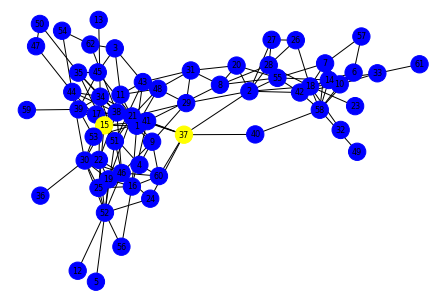

In [ ]:
color_map = []
for node in G:
    if node == maxBet or node == maxClo or node == maxDegC:
        color_map.append('yellow')
    else:
        color_map.append('blue')
nx.draw(G, node_color=color_map, with_labels=True, font_size=8)

In [ ]:
print('Node 37 has degree of ' + str(G.degree['37']) + ', betweenness of ' + str(bet['37']) + ', and closeness of '
      + str(clo['37']) + '. Node 15 has degree of ' + str(G.degree['15']) + ', betweenness of ' + str(bet['15'])
      + ', and closeness of ' + str(clo['15']) + '.')

Node 37 has degree of 7, betweenness of 0.2555607329080139, and closeness of 0.4178082191780822. Node 15 has degree of 12, betweenness of 0.06189120836661819, and closeness of 0.3765432098765432.


Node 37 has the highest betweenness and closeness, but node 15 has the highest degree. This means that while node 15 has more connections, node 37 is has shorter connections to the entire network and is also used as a bridge between groups. You can see this in the graph because node 15 is in the middle of a tight cluster, but node 37 is more spread out but forms a shorter path between the two ends of the graph.

In [ ]:
ratio = {}
for node in G:
    ratio[node] = bet[node]/degC[node]

maxRatio = max(ratio, key=ratio.get)
print(maxRatio + '\n Ratio: ' + str(ratio[maxRatio]) + '\n Betweenness: ' + str(bet[maxRatio]) + '\n Degree: '
      + str(degC[maxRatio]))

40
 Ratio: 2.342944544798765
 Betweenness: 0.07681785392782836
 Degree: 0.03278688524590164


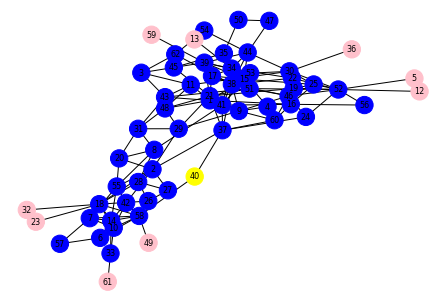

In [ ]:
color_map = []
for node in G:
    if node == maxRatio:
        color_map.append('yellow')
    elif ratio[node] == 0:
        color_map.append('pink')
    else:
        color_map.append('blue')
nx.draw(G, node_color=color_map, with_labels=True, font_size=8)

When checking the ration between betweenness and degree there is a new most survivable node because when weighing the value of connections node 40 has high betweenness and a low degree meaning it the connections it has are better on average than other nodes. The pink nodes all have a betweenness of zero as they are end points, that only connect to one other node.